In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-07-04 16:55:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.210.80, 172.217.169.240, 216.58.209.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.210.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K   389KB/s    in 0.2s    

2021-07-04 16:55:44 (389 KB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
data=open("/tmp/irish-lyrics-eof.txt").read()

In [8]:
split_data=data.lower().split("\n")

In [15]:
tokenizer = Tokenizer()

In [16]:
tokenizer.fit_on_texts(split_data)

In [13]:
word_index =tokenizer.word_index

In [17]:
total_words = len(word_index)+1

In [18]:
total_words

2690

In [23]:
input_sequence=[]

In [24]:
# split_data

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'my': 7,
 'in': 8,
 'me': 9,
 'for': 10,
 'you': 11,
 'all': 12,
 'was': 13,
 'she': 14,
 'that': 15,
 'on': 16,
 'with': 17,
 'her': 18,
 'but': 19,
 'as': 20,
 'when': 21,
 'love': 22,
 'is': 23,
 'your': 24,
 'it': 25,
 'will': 26,
 'from': 27,
 'by': 28,
 'they': 29,
 'be': 30,
 'are': 31,
 'so': 32,
 'he': 33,
 'old': 34,
 'no': 35,
 'oh': 36,
 'ill': 37,
 'at': 38,
 'one': 39,
 'his': 40,
 'there': 41,
 'were': 42,
 'heart': 43,
 'down': 44,
 'now': 45,
 'we': 46,
 'where': 47,
 'young': 48,
 'never': 49,
 'go': 50,
 'come': 51,
 'then': 52,
 'did': 53,
 'not': 54,
 'said': 55,
 'away': 56,
 'their': 57,
 'sweet': 58,
 'them': 59,
 'green': 60,
 'if': 61,
 'take': 62,
 'our': 63,
 'like': 64,
 'night': 65,
 'day': 66,
 'o': 67,
 'out': 68,
 'fair': 69,
 'this': 70,
 'town': 71,
 'have': 72,
 'can': 73,
 'true': 74,
 'its': 75,
 'thou': 76,
 'see': 77,
 'dear': 78,
 'more': 79,
 'theres': 80,
 'or': 81,
 'had': 82,
 'wou

In [39]:
input_sequences = []
for line in split_data:
    print(line)
    token_list= tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    for num in range(1,len(token_list)):
        input_sequences.append(token_list[:num+1])
    

come all ye maidens young and fair
[51, 12, 96, 1217, 48, 2, 69]
and you that are blooming in your prime
[2, 11, 15, 31, 361, 8, 24, 1218]
always beware and keep your garden fair
[272, 798, 2, 204, 24, 579, 69]
let no man steal away your thyme
[118, 35, 119, 799, 56, 24, 184]
for thyme it is a precious thing
[10, 184, 25, 23, 5, 580, 456]
and thyme brings all things to my mind
[2, 184, 800, 12, 801, 4, 7, 235]
nlyme with all its flavours, along with all its joys
[1219, 17, 12, 75, 1220, 236, 17, 12, 75, 802]
thyme, brings all things to my mind
[184, 800, 12, 801, 4, 7, 235]
once i and a bunch of thyme
[152, 3, 2, 5, 803, 6, 184]
i thought it never would decay
[3, 362, 25, 49, 83, 457]
then came a lusty sailor
[52, 108, 5, 1221, 804]
who chanced to pass my way
[106, 805, 4, 806, 7, 164]
and stole my bunch of thyme away
[2, 309, 7, 803, 6, 184, 56]
the sailor gave to me a rose
[1, 804, 141, 4, 9, 5, 102]
a rose that never would decay
[5, 102, 15, 49, 83, 457]
he gave it to me to keep me 

[47, 31, 24, 1728, 15, 476, 4, 421]
when you went for to carry a gun
[21, 11, 173, 10, 4, 1016, 5, 863]
indeed your dancing days are done
[1729, 24, 353, 171, 31, 716]
im happy for to see ye home
[95, 405, 10, 4, 77, 96, 89]
all from the island of sulloon
[12, 27, 1, 1730, 6, 1731]
so low in flesh, so high in bone
[32, 316, 8, 1732, 32, 123, 8, 1017]
oh johnny i hardly knew ye.
[36, 156, 3, 715, 512, 96]
ye havent an arm, ye havent a leg
[96, 1018, 113, 717, 96, 1018, 5, 718]
yere an armless, boneless, chickenless egg
[1733, 113, 1734, 1735, 1736, 1737]
yell have to put with a bowl out to beg
[1738, 72, 4, 131, 17, 5, 1739, 68, 4, 719]
theyre rolling out the guns again
[439, 1740, 68, 1, 530, 90]
but they never will take our sons again
[19, 29, 49, 26, 62, 63, 301, 90]
no they never will take our sons again
[35, 29, 49, 26, 62, 63, 301, 90]
johnny im swearing to ye.
[156, 95, 1741, 4, 96]
as i was a-walkin round kilgary mountain
[20, 3, 13, 5, 1019, 150, 1020, 138]
i met with captain p

[7, 132, 117, 1142, 53, 9, 2270]
and for one bare guinea swore my life away.
[2, 10, 39, 765, 2271, 552, 7, 191, 56]
as i was walking up wexford hill
[20, 3, 13, 2272, 86, 674, 311]
who could blame me to cry my fill?
[106, 103, 1143, 9, 4, 474, 7, 498]
i looked behind, and i looked before
[3, 342, 211, 2, 3, 342, 223]
but my aged mother i shall see no more.
[19, 7, 569, 161, 3, 120, 77, 35, 79]
and as i mounted the platform high
[2, 20, 3, 2273, 1, 2274, 123]
my aged father was standing by;
[7, 569, 100, 13, 763, 28]
my aged father did me deny
[7, 569, 100, 53, 9, 2275]
and the name he gave me was the croppy boy.
[2, 1, 449, 33, 141, 9, 13, 1, 1144, 194]
it was in dungannon this young man died
[25, 13, 8, 518, 70, 48, 119, 201]
and in dungannon his body lies.
[2, 8, 518, 40, 1117, 454]
and you good people that do pass by
[2, 11, 94, 411, 15, 181, 806, 28]
oh shed a tear for the croppy boy.
[36, 442, 5, 528, 10, 1, 1144, 194]
one morning early i walked forth
[39, 104, 139, 3, 2276, 1023

In [40]:
input_sequences

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [43]:
max_words =max([len(text) for text in input_sequences])

In [45]:
pad_sequence = np.array(pad_sequences(input_sequences,maxlen=max_words,padding="pre"))

In [52]:
pad_sequence[:,:-2]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,  51],
       [  0,   0,   0, ...,   0,  51,  12],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,  47],
       [  0,   0,   0, ...,   0,  47, 105]], dtype=int32)

In [53]:
train_text =pad_sequence[:,:-1]

array([[  12],
       [  96],
       [1217],
       ...,
       [ 105],
       [ 138],
       [ 184]], dtype=int32)

In [54]:
pad_sequence

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]], dtype=int32)

In [55]:
x=pad_sequence[:,:-1]

array([[  0,   0,   0, ...,   0,   0,  51],
       [  0,   0,   0, ...,   0,  51,  12],
       [  0,   0,   0, ...,  51,  12,  96],
       ...,
       [  0,   0,   0, ...,   0,   0,  47],
       [  0,   0,   0, ...,   0,  47, 105],
       [  0,   0,   0, ...,  47, 105, 138]], dtype=int32)

In [57]:
y=pad_sequence[:,-1:]

In [62]:
y

array([[  12],
       [  96],
       [1217],
       ...,
       [ 105],
       [ 138],
       [ 184]], dtype=int32)

In [69]:
ys = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [74]:
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_words-1))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(to))

In [75]:
max_words

16

In [71]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01) # Modify Adam instead of using the default parameters
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


NameError: name 'max_sequence_len' is not defined

In [65]:
print(len(ys[0]))

2690


In [67]:
np.sum(ys[0])

1.0

In [ ]:
tokenize

In [19]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [0]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [0]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [0]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [0]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [0]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [0]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

**Note:** The final Dense layer has 1 neuron per word. So the predicted word's neuron will light up after the network has processed the input.

In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01) # Modify Adam instead of using the default parameters
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 3s 9ms/step - loss: 6.6695 - accuracy: 0.0708
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 5.7984 - accuracy: 0.1115
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 4.9712 - accuracy: 0.1588
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 4.0754 - accuracy: 0.2272
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 3.2329 - accuracy: 0.3265
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 2.5353 - accuracy: 0.4359
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 2.0585 - accuracy: 0.5174
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.6985 - accuracy: 0.5954
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.4265 - accuracy: 0.6545
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 1.2239 - accura

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

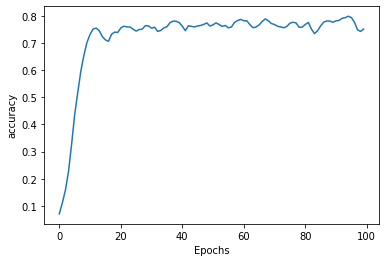

In [0]:
plot_graphs(history, 'accuracy')


In [0]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0) # Returns predicted token
	output_word = ""
	for word, index in tokenizer.word_index.items(): # Turn predicted token to a word
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this raking life dying you away your fathers name had gone gone gone gone gone gone gone gone so queer corporal casey so love the love im love im the love so love gone is gone eyes gone gone gone return i had anger gone of the reels sound gone so sweet i are plain to sit and sport gone gone gone so sweet are you me run from ofttimes thou with their fathers name me name gone is right skip i love gone is while an old almanack eyes opened love can gone is i love gone so love grew
